In [226]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import QuantileTransformer , StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

270398518.29145896 0.006062836062981969


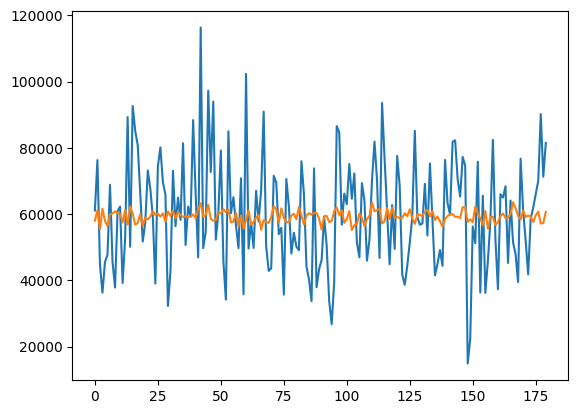

In [227]:
df = pd.read_csv(open('Stores.csv', 'rb'))  #https://www.kaggle.com/datasets/surajjha101/stores-area-and-sales-data
df.head()

x = np.hstack((  
    df['Store_Area'].values.reshape(-1, 1),
    df['Items_Available'].values.reshape(-1, 1),
    df['Daily_Customer_Count'].values.reshape(-1, 1)
))

y = df['Store_Sales'].values
#plt.plot(df['Store_Sales'])

x_base, x_test, y_base, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_base_scaled, y_base)

y_pred = model.predict(x_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse, r2)

plt.plot(y_test)
plt.plot(y_pred)

99848350.30166405 -0.030618552143139244


C:\Users\thor32\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (625). n_quantiles is set to n_samples.
  warnings.warn(


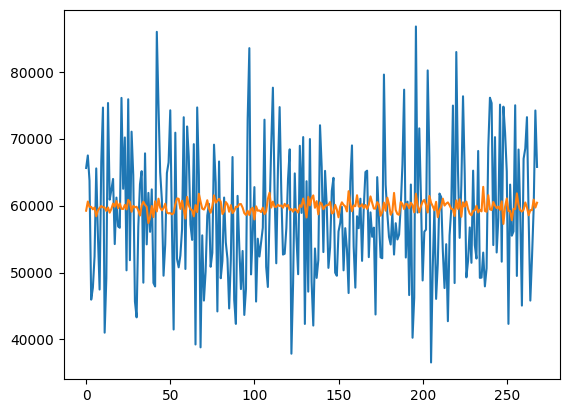

In [228]:
df2 = pd.read_csv(open('Stores.csv', 'rb'))  #https://www.kaggle.com/datasets/surajjha101/stores-area-and-sales-data
df2.head()

df2['Store_Sales'] = df2['Store_Sales'].rolling(window=3).mean()
df2.dropna(inplace=True)

y2 = df2['Store_Sales'].values.reshape(-1, 1)

x2 = np.hstack((  
    df2['Store_Area'].values.reshape(-1, 1),
    df2['Items_Available'].values.reshape(-1, 1),
    df2['Daily_Customer_Count'].values.reshape(-1, 1)
))

x2_base, x2_test, y2_base, y2_test = train_test_split(x2, y2, test_size = 0.3, random_state = 42)

quantile_transformer = QuantileTransformer(random_state=50)
x2_base_qscaled = quantile_transformer.fit_transform(x2_base)
x2_test_qscaled = quantile_transformer.transform(x2_test)

model2 = LinearRegression()
model2.fit(x2_base_qscaled, y2_base)

y2_pred = model2.predict(x2_test_qscaled)

mse2 = mean_squared_error(y2_test, y2_pred)
r22 = r2_score(y2_test, y2_pred)

print(mse2, r22)

plt.plot(y2_test)
plt.plot(y2_pred)


270398518.29145896 0.006062836062981969


C:\Users\thor32\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


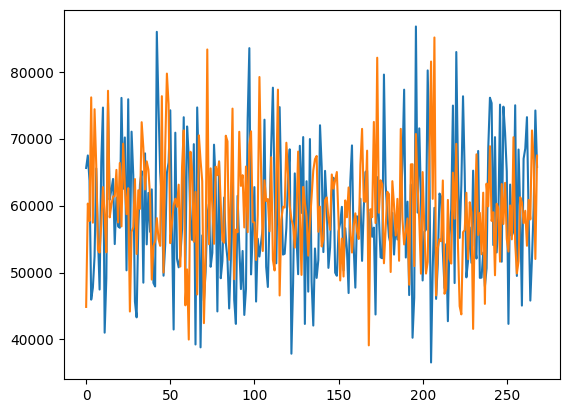

In [229]:
model3 = GradientBoostingRegressor(n_estimators=30, max_depth=20, random_state=42)
model3.fit(x2_base_qscaled, y2_base)

y3_pred = model3.predict(x2_test_qscaled)

print(mse, r2)

mse2 = mean_squared_error(y2_test, y3_pred)
r22 = r2_score(y2_test, y3_pred)

plt.plot(y2_test)
plt.plot(y3_pred)